# 🔍 Sistema Watcher - Análisis de Boletines Oficiales
## Provincia de Córdoba | Agosto 2025 | Agente de Ciencia de Datos

**Rol**: Agente de Ciencia de Datos especializado en análisis de transparencia gubernamental y detección automatizada de irregularidades administrativas.

### 📋 Contexto del Dataset
- **Fuente**: Boletines Oficiales Provincia de Córdoba
- **Período**: Agosto 2025 (01/08 al 29/08)
- **Estructura**: 5 secciones estándar por boletín
- **Formato original**: PDFs → JSON estructurado
- **Total estimado**: ~95 documentos

### 🏛️ Estructura de Secciones
1. **1ª Sección**: Designaciones, cesantías, decretos del Ejecutivo
2. **2ª Sección**: Compras públicas, contrataciones, licitaciones
3. **3ª Sección**: Transferencias, subsidios, convenios
4. **4ª Sección**: Obras públicas, adjudicaciones, planificación
5. **5ª Sección**: Notificaciones judiciales, convocatorias

### 🎯 Objetivos de ML/Analytics
1. **Clasificación supervisada** de actos administrativos por tipo y riesgo
2. **Extracción de entidades** clave (montos, beneficiarios, objetos)
3. **Detección de anomalías** en patrones de contratación
4. **Análisis temporal** de tendencias presupuestarias
5. **Generación de features** para modelos predictivos
6. **Dashboard ciudadano** con métricas de transparencia

### ⚠️ Niveles de Riesgo (Target Variables)
- 🔴 **ALTO**: Desvíos graves, falta de licitación, montos desproporcionados
- 🟡 **MEDIO**: Contrataciones repetitivas, discrecionales con justificación
- 🟢 **BAJO**: Actos legítimos, seguimiento rutinario

---


## ⚙️ **CONFIGURACIÓN DEL ENTORNO**

**OPCIÓN 1 - Instalación rápida desde terminal:**
```bash
cd /Users/germanevangelisti/watcher-agent/watcher-lab
pip install -r requirements.txt
```

**OPCIÓN 2 - Instalación desde notebook:**
Ejecutar la celda anterior para instalar automáticamente todas las dependencias.

**OPCIÓN 3 - Instalación manual mínima:**
```bash
pip install pandas numpy matplotlib seaborn plotly pdfplumber scikit-learn
```

---
### 🎯 **¿Cuál prefieres usar?**
- **Opción 1** es la más profesional y recomendada
- **Opción 2** es conveniente pero puede ser lenta
- **Opción 3** es rápida para empezar inmediatamente


In [4]:
# 📦 INSTALACIÓN DE DEPENDENCIAS (ejecutar solo una vez)
import subprocess
import sys

def install_packages():
    """Instala los paquetes necesarios para el análisis"""
    packages = [
        'pandas',
        'numpy', 
        'matplotlib',
        'seaborn',
        'plotly',
        'scikit-learn',
        'xgboost',
        'pdfplumber',
        'PyPDF2',
        'spacy'
    ]
    
    print("🔄 Instalando dependencias necesarias...")
    for package in packages:
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            print(f"✅ {package} instalado correctamente")
        except subprocess.CalledProcessError:
            print(f"❌ Error instalando {package}")
    
    print("\n🎉 Instalación completada!")

# Ejecutar instalación
install_packages()

print("\n" + "="*60)
print("🚀 INICIANDO IMPORTS...")
print("="*60)

# 📦 IMPORTS PRINCIPALES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Para procesamiento de PDFs y texto
try:
    import PyPDF2
    import pdfplumber
    print("✅ Librerías PDF importadas correctamente")
except ImportError as e:
    print(f"❌ Error con PDFs: {e}")

import re
from pathlib import Path
import json
from datetime import datetime, timedelta
import os

# Para NLP y ML
try:
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
    from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn.preprocessing import LabelEncoder, StandardScaler
    print("✅ Scikit-learn importado correctamente")
except ImportError as e:
    print(f"❌ Error con sklearn: {e}")

try:
    import xgboost as xgb
    print("✅ XGBoost importado correctamente")
except ImportError as e:
    print(f"❌ Error con XGBoost: {e}")

# Configuración de visualización
plt.style.use('default')  # Usar estilo por defecto si seaborn-v0_8 no está disponible
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

print("\n🚀 Sistema Watcher - Análisis de Boletines Oficiales")
print("📅 Período: Agosto 2025 | Provincia de Córdoba")
print("🔧 Entorno configurado correctamente")
print("=" * 50)


🔄 Instalando dependencias necesarias...
✅ pandas instalado correctamente
✅ numpy instalado correctamente
✅ matplotlib instalado correctamente
✅ seaborn instalado correctamente
✅ plotly instalado correctamente
✅ scikit-learn instalado correctamente
✅ xgboost instalado correctamente
✅ pdfplumber instalado correctamente
✅ PyPDF2 instalado correctamente
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 22.4 MB/s  0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 53.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 635.7/635.7 kB 25.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/germanevangelisti/watcher-agent/.venv/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <89AD948E-E564-3266-867D-7AF89D6488F0> /Users/germanevangelisti/watcher-agent/.venv/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/Users/germanevangelisti/.pyenv/versions/3.9.10/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/germanevangelisti/.pyenv/versions/3.9.10/lib/libomp.dylib' (no such file), '/opt/homebrew/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libomp.dylib' (no such file), '/Users/germanevangelisti/.pyenv/versions/3.9.10/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/germanevangelisti/.pyenv/versions/3.9.10/lib/libomp.dylib' (no such file), '/opt/homebrew/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libomp.dylib' (no such file)"]


In [5]:
# 🚀 IMPORTS SIMPLIFICADOS (usar después de instalar dependencias)

# Core
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Procesamiento
import re
from pathlib import Path
import json
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# PDFs
import pdfplumber

# ML básico
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Configuración
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Imports básicos cargados correctamente")
print("🚀 Sistema Watcher - Análisis de Boletines Oficiales")
print("📅 Período: Agosto 2025 | Provincia de Córdoba")
print("=" * 50)


✅ Imports básicos cargados correctamente
🚀 Sistema Watcher - Análisis de Boletines Oficiales
📅 Período: Agosto 2025 | Provincia de Córdoba


## 📂 FASE 1: EXPLORACIÓN Y CARGA DE DATOS

En esta primera fase vamos a:
1. **Inventariar** todos los archivos PDF del dataset
2. **Analizar la estructura** de nombres y fechas
3. **Extraer una muestra** de contenido para entender el formato
4. **Identificar patrones** en la organización de las secciones


In [6]:
# 🗂️ INVENTARIO DE ARCHIVOS
boletines_path = Path("/Users/germanevangelisti/watcher-agent/boletines")
pdf_files = list(boletines_path.glob("*.pdf"))

print(f"📊 ESTADÍSTICAS DEL DATASET")
print(f"Total de archivos PDF: {len(pdf_files)}")
print(f"Directorio: {boletines_path}")
print("\n" + "="*50)

# Análisis de estructura de nombres
file_info = []
for pdf_file in sorted(pdf_files):
    filename = pdf_file.name
    # Extraer fecha y sección del nombre: YYYYMMDD_S_Secc.pdf
    match = re.match(r'(\d{8})_(\d+)_Secc\.pdf', filename)
    if match:
        date_str, section = match.groups()
        date_obj = datetime.strptime(date_str, '%Y%m%d')
        file_info.append({
            'filename': filename,
            'fecha': date_obj,
            'fecha_str': date_str,
            'seccion': int(section),
            'dia_semana': date_obj.strftime('%A'),
            'size_mb': pdf_file.stat().st_size / (1024*1024)
        })

# Crear DataFrame del inventario
df_inventario = pd.DataFrame(file_info)
print(f"📅 Rango de fechas: {df_inventario['fecha'].min().date()} → {df_inventario['fecha'].max().date()}")
print(f"📋 Secciones encontradas: {sorted(df_inventario['seccion'].unique())}")
print(f"💾 Tamaño total: {df_inventario['size_mb'].sum():.1f} MB")

# Mostrar las primeras filas
print("\n🔍 MUESTRA DEL INVENTARIO:")
print(df_inventario.head(10))


📊 ESTADÍSTICAS DEL DATASET
Total de archivos PDF: 99
Directorio: /Users/germanevangelisti/watcher-agent/boletines

📅 Rango de fechas: 2025-08-01 → 2025-08-29
📋 Secciones encontradas: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
💾 Tamaño total: 84.1 MB

🔍 MUESTRA DEL INVENTARIO:
              filename      fecha fecha_str  seccion dia_semana   size_mb
0  20250801_1_Secc.pdf 2025-08-01  20250801        1     Friday  0.486480
1  20250801_2_Secc.pdf 2025-08-01  20250801        2     Friday  0.785443
2  20250801_3_Secc.pdf 2025-08-01  20250801        3     Friday  0.726423
3  20250801_4_Secc.pdf 2025-08-01  20250801        4     Friday  1.196785
4  20250801_5_Secc.pdf 2025-08-01  20250801        5     Friday  0.470955
5  20250804_1_Secc.pdf 2025-08-04  20250804        1     Monday  0.672462
6  20250804_2_Secc.pdf 2025-08-04  20250804        2     Monday  0.925442
7  20250804_3_Secc.pdf 2025-08-04  20250804        3     Monday  0.745102
8  20250804_4_Secc.pdf 2025-08-04 

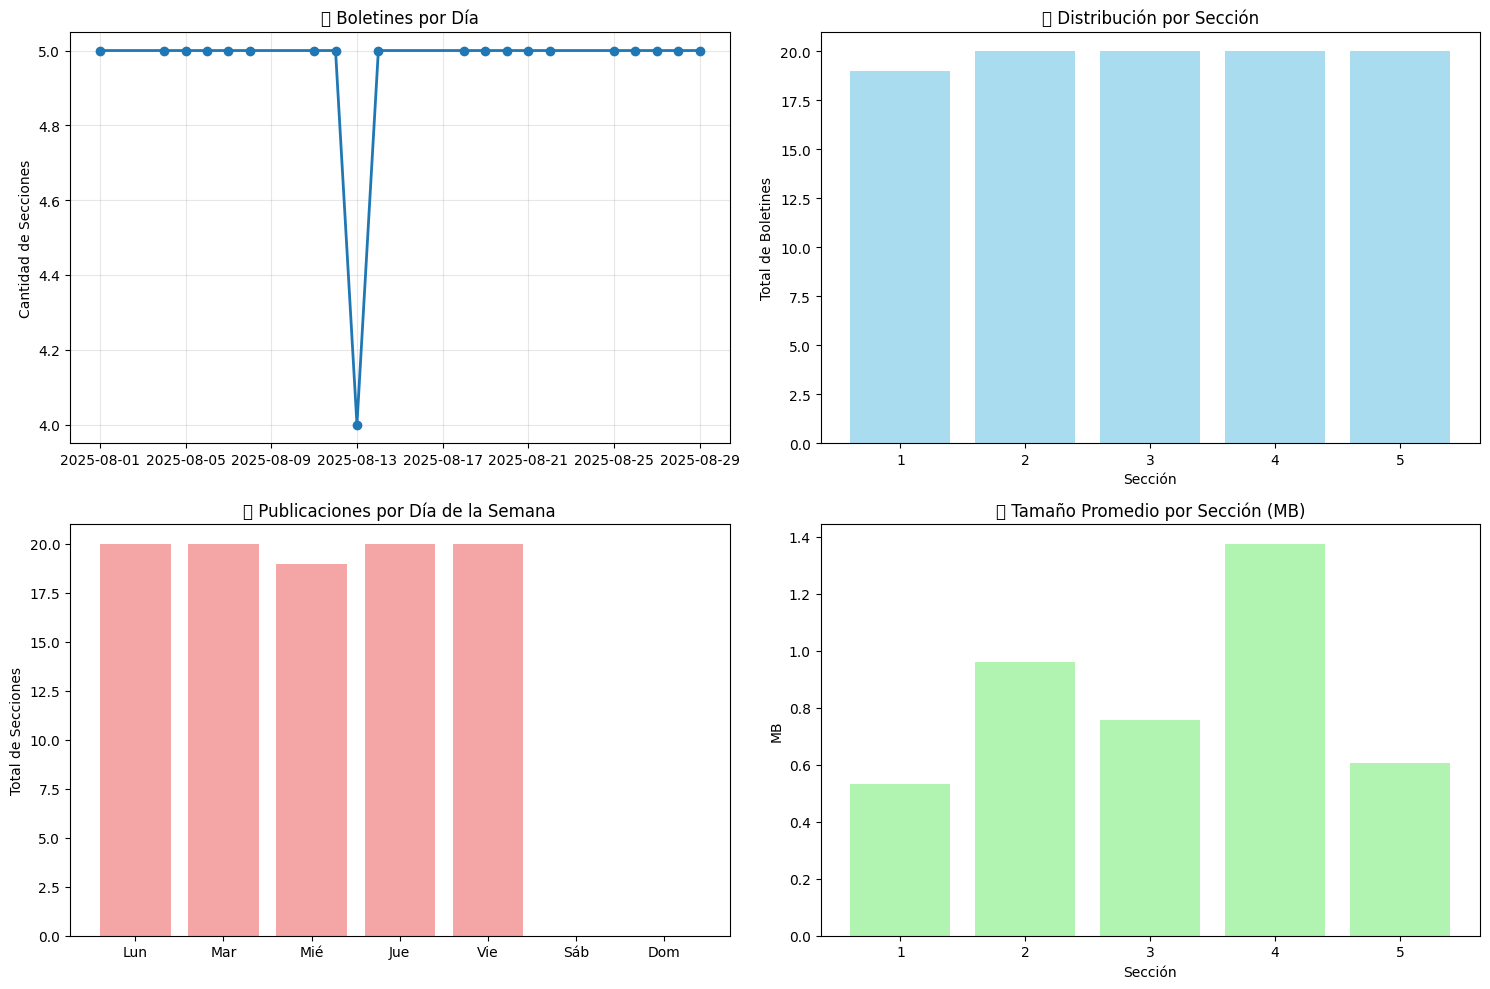


📈 PATRONES IDENTIFICADOS:
• Sección más frecuente: 2 (20 boletines)
• Día con más publicaciones: Monday (20 secciones)
• Promedio de secciones por día: 5.0
• Sección más voluminosa: 4 (1.37 MB promedio)


In [7]:
# 📊 ANÁLISIS TEMPORAL DE PUBLICACIONES
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Distribución por día
daily_counts = df_inventario.groupby('fecha').size()
axes[0,0].plot(daily_counts.index, daily_counts.values, marker='o', linewidth=2)
axes[0,0].set_title('📅 Boletines por Día')
axes[0,0].set_ylabel('Cantidad de Secciones')
axes[0,0].grid(True, alpha=0.3)

# 2. Distribución por sección
section_counts = df_inventario['seccion'].value_counts().sort_index()
axes[0,1].bar(section_counts.index, section_counts.values, color='skyblue', alpha=0.7)
axes[0,1].set_title('📋 Distribución por Sección')
axes[0,1].set_xlabel('Sección')
axes[0,1].set_ylabel('Total de Boletines')

# 3. Distribución por día de la semana
weekday_counts = df_inventario['dia_semana'].value_counts()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = weekday_counts.reindex(weekday_order, fill_value=0)
axes[1,0].bar(range(len(weekday_counts)), weekday_counts.values, color='lightcoral', alpha=0.7)
axes[1,0].set_title('📆 Publicaciones por Día de la Semana')
axes[1,0].set_xticks(range(len(weekday_counts)))
axes[1,0].set_xticklabels(['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'])
axes[1,0].set_ylabel('Total de Secciones')

# 4. Tamaño promedio por sección
size_by_section = df_inventario.groupby('seccion')['size_mb'].mean()
axes[1,1].bar(size_by_section.index, size_by_section.values, color='lightgreen', alpha=0.7)
axes[1,1].set_title('💾 Tamaño Promedio por Sección (MB)')
axes[1,1].set_xlabel('Sección')
axes[1,1].set_ylabel('MB')

plt.tight_layout()
plt.show()

# Estadísticas adicionales
print("\n📈 PATRONES IDENTIFICADOS:")
print(f"• Sección más frecuente: {section_counts.idxmax()} ({section_counts.max()} boletines)")
print(f"• Día con más publicaciones: {weekday_counts.idxmax()} ({weekday_counts.max()} secciones)")
print(f"• Promedio de secciones por día: {len(df_inventario) / len(daily_counts):.1f}")
print(f"• Sección más voluminosa: {size_by_section.idxmax()} ({size_by_section.max():.2f} MB promedio)")


## 🔍 FASE 2: EXTRACCIÓN Y ANÁLISIS DE CONTENIDO

Ahora vamos a extraer y analizar el contenido de los PDFs para:
1. **Entender la estructura** interna de cada sección
2. **Identificar patrones** de texto y formato
3. **Extraer entidades** clave (montos, entidades, tipos de actos)
4. **Preparar los datos** para el análisis de ML


In [8]:
# 📖 FUNCIÓN DE EXTRACCIÓN DE TEXTO
def extract_pdf_content(pdf_path):
    """
    Extrae el contenido de texto de un PDF usando pdfplumber
    """
    try:
        with pdfplumber.open(pdf_path) as pdf:
            text_content = ""
            for page in pdf.pages:
                page_text = page.extract_text()
                if page_text:
                    text_content += page_text + "\n\n"
            
            return {
                'success': True,
                'text': text_content,
                'num_pages': len(pdf.pages),
                'error': None
            }
    except Exception as e:
        return {
            'success': False,
            'text': "",
            'num_pages': 0,
            'error': str(e)
        }

# 🎯 EXTRACCIÓN DE MUESTRA REPRESENTATIVA
print("🔄 Extrayendo muestra de contenido...")

# Seleccionar una muestra estratificada (2 archivos por sección)
sample_files = []
for section in sorted(df_inventario['seccion'].unique()):
    section_files = df_inventario[df_inventario['seccion'] == section]['filename'].head(2).tolist()
    sample_files.extend(section_files)

print(f"📑 Procesando {len(sample_files)} archivos de muestra...")

# Extraer contenido de la muestra
sample_data = []
for filename in sample_files:
    pdf_path = boletines_path / filename
    print(f"  📄 Procesando: {filename}")
    
    content = extract_pdf_content(pdf_path)
    
    # Obtener metadata del archivo
    file_row = df_inventario[df_inventario['filename'] == filename].iloc[0]
    
    sample_data.append({
        'filename': filename,
        'fecha': file_row['fecha'],
        'seccion': file_row['seccion'],
        'success': content['success'],
        'text': content['text'],
        'num_pages': content['num_pages'],
        'text_length': len(content['text']),
        'error': content['error']
    })

# Crear DataFrame de la muestra
df_sample = pd.DataFrame(sample_data)

print(f"\n✅ Extracción completada:")
print(f"• Archivos procesados exitosamente: {df_sample['success'].sum()}")
print(f"• Archivos con errores: {(~df_sample['success']).sum()}")
print(f"• Total de caracteres extraídos: {df_sample['text_length'].sum():,}")

df_sample[['filename', 'seccion', 'success', 'num_pages', 'text_length']].head(10)


🔄 Extrayendo muestra de contenido...
📑 Procesando 10 archivos de muestra...
  📄 Procesando: 20250801_1_Secc.pdf
  📄 Procesando: 20250804_1_Secc.pdf
  📄 Procesando: 20250801_2_Secc.pdf
  📄 Procesando: 20250804_2_Secc.pdf
  📄 Procesando: 20250801_3_Secc.pdf
  📄 Procesando: 20250804_3_Secc.pdf
  📄 Procesando: 20250801_4_Secc.pdf
  📄 Procesando: 20250804_4_Secc.pdf
  📄 Procesando: 20250801_5_Secc.pdf
  📄 Procesando: 20250804_5_Secc.pdf

✅ Extracción completada:
• Archivos procesados exitosamente: 10
• Archivos con errores: 0
• Total de caracteres extraídos: 1,791,028


,filename,seccion,success,num_pages,text_length
0,20250801_1_Secc.pdf,1,True,6,29869
1,20250804_1_Secc.pdf,1,True,27,190353
2,20250801_2_Secc.pdf,2,True,43,330184
3,20250804_2_Secc.pdf,2,True,56,433099
4,20250801_3_Secc.pdf,3,True,38,294740
5,20250804_3_Secc.pdf,3,True,40,311445
6,20250801_4_Secc.pdf,4,True,13,89847
7,20250804_4_Secc.pdf,4,True,12,80356
8,20250801_5_Secc.pdf,5,True,4,15622
9,20250804_5_Secc.pdf,5,True,4,15513


In [10]:
# 🔍 ANÁLISIS DE CONTENIDO POR SECCIÓN
def analyze_section_content(section_num, max_chars=1000):
    """
    Analiza el contenido de una sección específica
    """
    section_data = df_sample[df_sample['seccion'] == section_num]
    
    if len(section_data) == 0:
        print(f"❌ No hay datos para la sección {section_num}")
        return
    
    print(f"📋 ANÁLISIS SECCIÓN {section_num}")
    print("="*50)
    
    for idx, row in section_data.iterrows():
        print(f"\n📄 Archivo: {row['filename']}")
        print(f"📄 Páginas: {row['num_pages']}")
        print(f"📊 Caracteres: {row['text_length']:,}")
        
        if row['success'] and row['text']:
            # Mostrar una muestra del contenido
            sample_text = row['text'][:max_chars]
            print(f"\n🔖 MUESTRA DE CONTENIDO:")
            print("-" * 30)
            print(sample_text)
            if len(row['text']) > max_chars:
                print(f"\n... (mostrando {max_chars} de {row['text_length']} caracteres)")
        else:
            print(f"❌ Error: {row['error']}")
        
        print("\n" + "="*50)

# Analizar cada sección
for section in sorted(df_sample['seccion'].unique()):
    analyze_section_content(section, max_chars=800)


📋 ANÁLISIS SECCIÓN 1

📄 Archivo: 20250801_1_Secc.pdf
📄 Páginas: 6
📊 Caracteres: 29,869

🔖 MUESTRA DE CONTENIDO:
------------------------------
1
a
LEGISLACIÓN Y
VIERNES 1 DE AGOSTO DE 2025 NORMATIVAS
AÑO CXII - TOMO DCCXXVIII - Nº 148 SECCION
CÓRDOBA, (R.A.)
http://boletinoficial.cba.gov.ar SUMARIO
Email: boe@cba.gov.ar
PODER EJECUTIVO
PODER EJECUTIVO
Decreto N° 189 ....................................................................Pag. 1
Decreto N° 189 MINISTERIO DE AMBIENTE Y ECONOMÍA CIRCULAR
Resolución N° 133 ...............................................................Pag. 1
Resolución N° 185 ...............................................................Pag. 2
Córdoba, 23 de julio 2025
MINISTERIO DE AMBIENTE Y ECONOMÍA CIRCULAR
En uso de las atribuciones conferidas por el artículo 144 de la Constitución Resolución N° 112 ...............................................................Pag. 3
Provincial;
SECRETARÍA DE EDUCA

... (mostrando 800 de 29869 caracteres)


📄 Archivo: 20

## 🎯 FASE 3: EXTRACCIÓN DE ENTIDADES Y FEATURES

En esta fase implementaremos:
1. **Extracción de montos** en pesos argentinos
2. **Identificación de beneficiarios** y entidades
3. **Clasificación de tipos de actos** administrativos
4. **Detección de palabras clave** para riesgo
5. **Generación de features** para ML


In [11]:
# 💰 EXTRACTOR DE MONTOS Y ENTIDADES
import re
from typing import List, Dict, Optional

class WatcherEntityExtractor:
    """
    Extractor especializado para entidades de boletines oficiales
    """
    
    def __init__(self):
        # Patrones para extracción de montos
        self.amount_patterns = [
            r'\$\s*(\d{1,3}(?:\.\d{3})*(?:,\d{2})?)',  # $999.999.999,99
            r'PESOS\s+(\w+(?:\s+\w+)*)',  # PESOS CINCO MIL
            r'(\d{1,3}(?:\.\d{3})*(?:,\d{2})?)\s*PESOS',  # 999.999,99 PESOS
        ]
        
        # Patrones para beneficiarios/entidades
        self.entity_patterns = [
            r'(?:BENEFICIARIO|CONTRATISTA|PROVEEDOR|ADJUDICADO A):\s*([A-Z\s\.,]+)',
            r'(?:EMPRESA|COOPERATIVA|FUNDACIÓN|ASOCIACIÓN)\s+([A-Z\s\.,]+)',
            r'(?:SR\.|SRA\.|SEÑOR|SEÑORA)\s+([A-Z\s\.]+)',
        ]
        
        # Palabras clave para clasificación de riesgo
        self.risk_keywords = {
            'ALTO': [
                'urgencia', 'emergencia', 'excepción', 'sin licitación',
                'contratación directa', 'exclusivo', 'único proveedor',
                'decreto de necesidad', 'situación excepcional'
            ],
            'MEDIO': [
                'discrecional', 'renovación', 'prórroga', 'modificación',
                'ampliación', 'adicional', 'complementario', 'convenio marco'
            ],
            'BAJO': [
                'licitación pública', 'concurso', 'proceso regular',
                'marco legal', 'transparencia', 'registro público'
            ]
        }
        
        # Tipos de actos administrativos
        self.act_types = {
            'CONTRATACION': ['contrat', 'licit', 'adjudic', 'proveedor', 'servicio'],
            'DESIGNACION': ['design', 'nombr', 'cargo', 'función', 'puesto'],
            'SUBSIDIO': ['subsid', 'transfer', 'ayuda', 'apoyo económico'],
            'OBRA_PUBLICA': ['obra', 'construcción', 'infraestructura', 'proyecto'],
            'CONVENIO': ['convenio', 'acuerdo', 'alianza', 'cooperación']
        }
    
    def extract_amounts(self, text: str) -> List[Dict]:
        """Extrae montos del texto"""
        amounts = []
        
        for pattern in self.amount_patterns:
            matches = re.finditer(pattern, text, re.IGNORECASE)
            for match in matches:
                amounts.append({
                    'raw_text': match.group(0),
                    'amount': match.group(1),
                    'position': match.start()
                })
        
        return amounts
    
    def extract_entities(self, text: str) -> List[Dict]:
        """Extrae entidades/beneficiarios del texto"""
        entities = []
        
        for pattern in self.entity_patterns:
            matches = re.finditer(pattern, text, re.IGNORECASE)
            for match in matches:
                entities.append({
                    'raw_text': match.group(0),
                    'entity': match.group(1).strip(),
                    'position': match.start()
                })
        
        return entities
    
    def classify_risk(self, text: str) -> Dict:
        """Clasifica el nivel de riesgo basado en palabras clave"""
        text_lower = text.lower()
        risk_scores = {'ALTO': 0, 'MEDIO': 0, 'BAJO': 0}
        found_keywords = {'ALTO': [], 'MEDIO': [], 'BAJO': []}
        
        for risk_level, keywords in self.risk_keywords.items():
            for keyword in keywords:
                if keyword.lower() in text_lower:
                    risk_scores[risk_level] += 1
                    found_keywords[risk_level].append(keyword)
        
        # Determinar clasificación final
        max_score = max(risk_scores.values())
        if max_score == 0:
            classification = 'MEDIO'  # Default si no hay keywords
        else:
            classification = max(risk_scores.keys(), key=lambda k: risk_scores[k])
        
        return {
            'classification': classification,
            'scores': risk_scores,
            'keywords_found': found_keywords
        }
    
    def classify_act_type(self, text: str) -> Dict:
        """Clasifica el tipo de acto administrativo"""
        text_lower = text.lower()
        type_scores = {act_type: 0 for act_type in self.act_types.keys()}
        
        for act_type, keywords in self.act_types.items():
            for keyword in keywords:
                if keyword.lower() in text_lower:
                    type_scores[act_type] += 1
        
        max_score = max(type_scores.values()) if type_scores else 0
        if max_score == 0:
            classification = 'OTROS'
        else:
            classification = max(type_scores.keys(), key=lambda k: type_scores[k])
        
        return {
            'classification': classification,
            'scores': type_scores,
            'confidence': max_score
        }

# Inicializar extractor
extractor = WatcherEntityExtractor()
print("🤖 WatcherEntityExtractor inicializado correctamente")


🤖 WatcherEntityExtractor inicializado correctamente


🔄 Iniciando procesamiento de 99 archivos...
⚡ Usando 6 workers en paralelo


📄 Procesando PDFs: 100%|██████████| 99/99 [12:04<00:00,  7.32s/it]


✅ Procesamiento completado:
• Archivos procesados exitosamente: 99
• Archivos con errores: 0

⏱️ Tiempo total de procesamiento: 724.60 segundos
📊 Promedio por archivo: 7.32 segundos

📋 Dataset completo creado: 99 registros


📈 ESTADÍSTICAS GENERALES DEL DATASET COMPLETO
📄 Total documentos procesados: 99
❌ Documentos con errores: 0
✅ Tasa de éxito: 100.0%
📊 Total palabras procesadas: 2,816,696
💰 Total menciones de montos: 10949
🏢 Total entidades identificadas: 6924

📋 DISTRIBUCIÓN POR SECCIÓN:
         Documentos  Palabras_Promedio  Total_Montos  Total_Entidades  \
seccion                                                                 
1                19            5973.89            42              350   
2                20           71460.05          5436             3796   
3                20           43769.60          4458             2468   
4                20           15808.45           568              172   
5                20            4121.50           445              138   

         Transparencia_Promedio  Tiempo_Procesamiento  
seccion                                                
1                         37.79                  0.04  
2                         34.40                

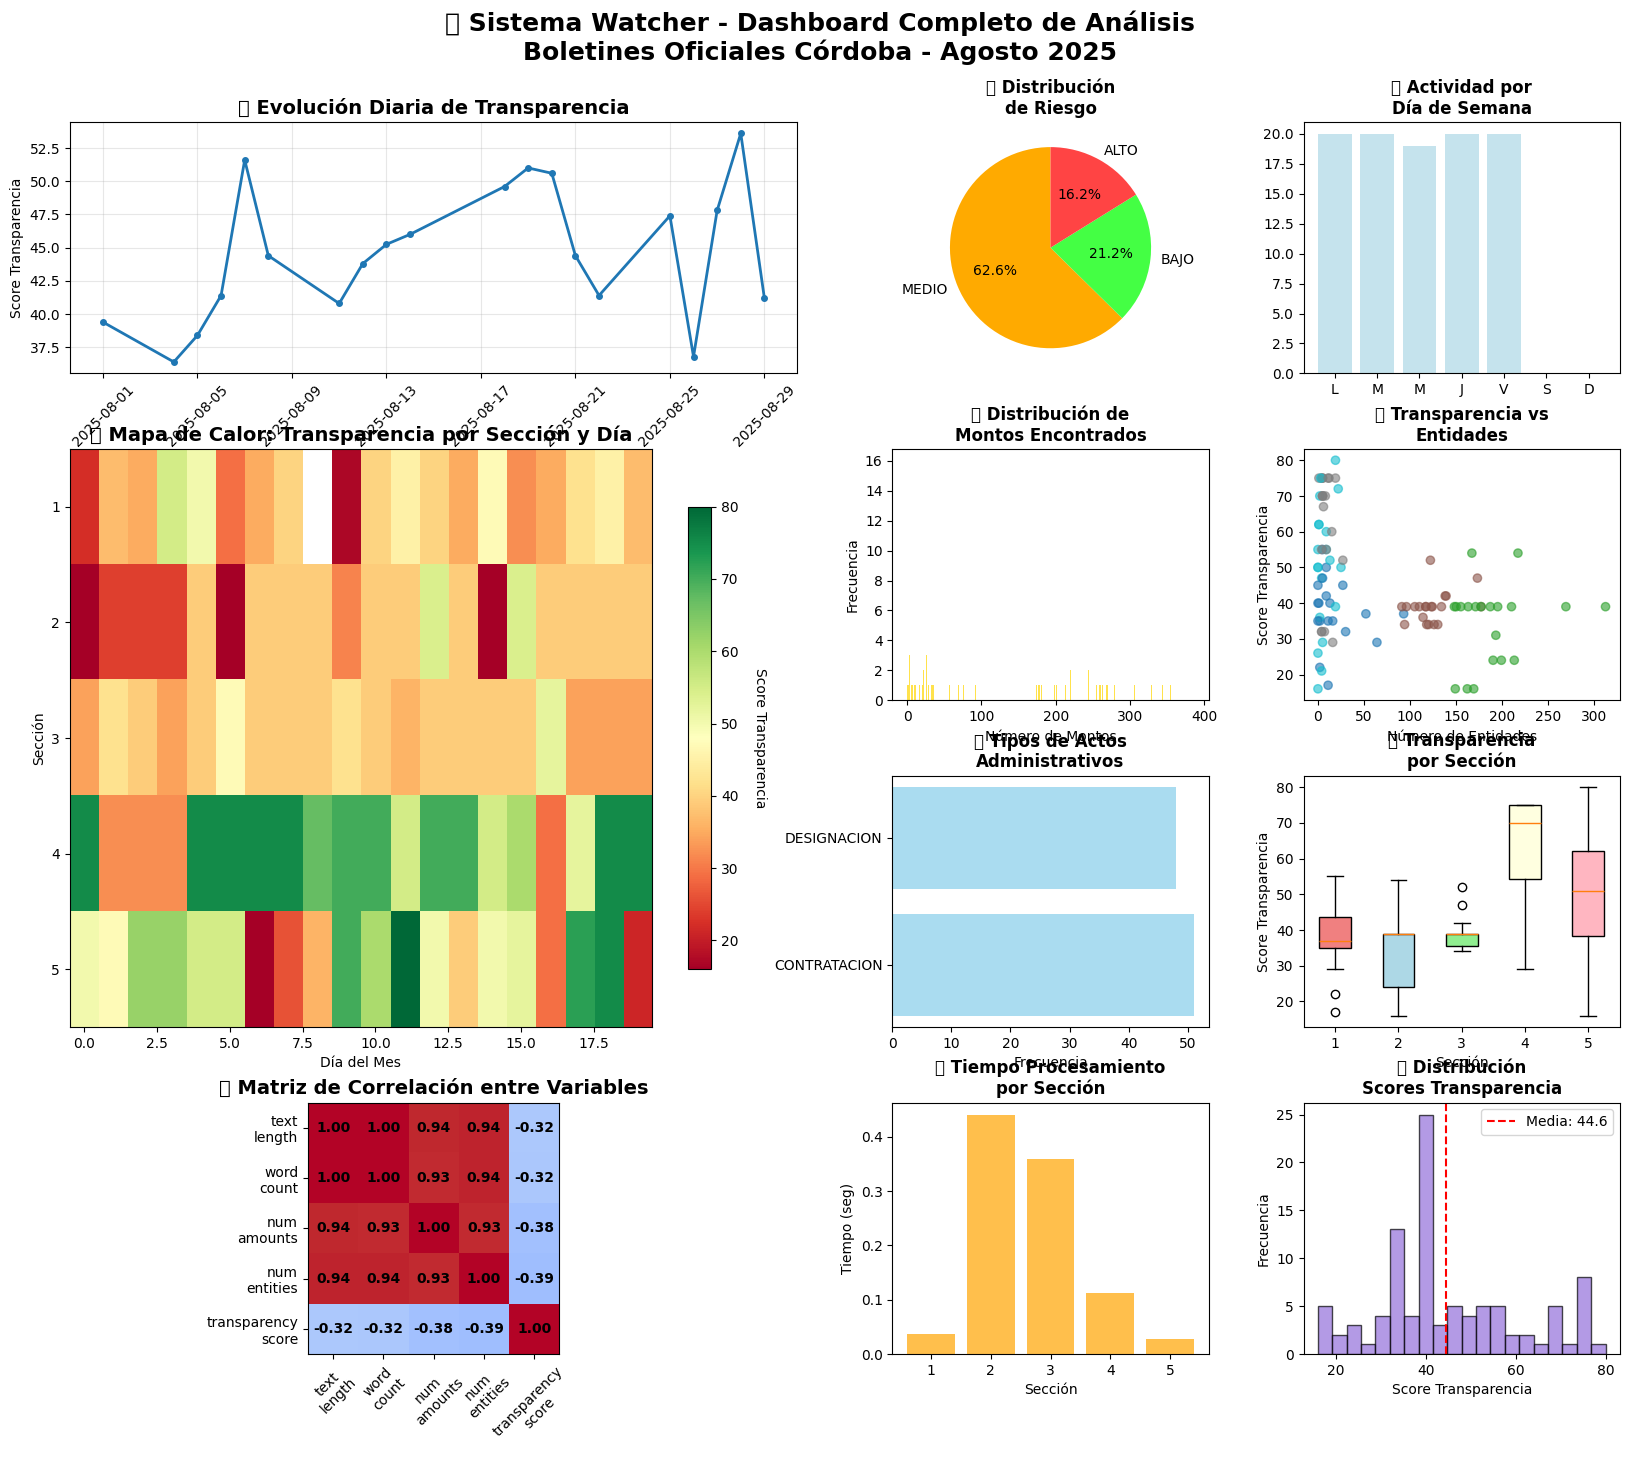


🎯 RESUMEN EJECUTIVO:
• Score transparencia promedio: 44.6/100
• Documentos de riesgo alto: 16 (16.2%)
• Sección más transparente: 4
• Día con mayor actividad: Friday
• Procesamiento total: 19.5 segundos


🚀 INICIANDO PIPELINE DE MACHINE LEARNING
🔧 Preparando features para ML...
✅ Features preparadas: 10 numéricas, 23 texto
🎯 Entrenando clasificador de riesgo...
📊 Evaluación del clasificador de riesgo:
Accuracy: 0.967
🔝 Top 5 features más importantes:
              feature  importance
6  transparency_score    0.486605
5        num_entities    0.093442
0         text_length    0.071880
1          word_count    0.069450
3     avg_word_length    0.066475
🚨 Detectando anomalías...
🔍 Anomalías detectadas: 10 (10.1%)
🚨 Top 5 anomalías detectadas:
               filename  seccion risk_level  transparency_score  anomaly_score
86  20250825_2_Secc.pdf        2       BAJO                  54      -0.125681
57  20250818_2_Secc.pdf        2      MEDIO                  39      -0.034512
30  20250808_3_Secc.pdf        3      MEDIO                  47      -0.032557
0   20250801_5_Secc.pdf        5      MEDIO                  50      -0.031170
33  20250808_2_Secc.pdf        2       ALTO                 

📊 Dataset completo guardado en: resultados_watcher/dataset_boletines_cordoba_agosto2025_20250918_233617.csv
💾 Modelo risk_classifier guardado en resultados_watcher/modelos_watcher_20250918_233617_risk_classifier_20250918_233617.pkl
💾 Modelo anomaly_detector guardado en resultados_watcher/modelos_watcher_20250918_233617_anomaly_detector_20250918_233617.pkl
💾 Modelo clustering guardado en resultados_watcher/modelos_watcher_20250918_233617_clustering_20250918_233617.pkl
📝 Resumen ejecutivo guardado en: resultados_watcher/resumen_ejecutivo_20250918_233617.txt

🎉 ANÁLISIS COMPLETO FINALIZADO
📄 Total documentos analizados: 99
⏱️ Tiempo total de procesamiento: 724.60 segundos
🤖 Modelos ML entrenados: 3
🚨 Alertas generadas: 3
📊 Features extraídas: 10
💾 Archivos guardados en: resultados_watcher

🔧 ARCHIVOS DISPONIBLES:
  • modelos_watcher_20250918_233617_risk_classifier_20250918_233617.pkl
  • modelos_watcher_20250918_233617_clustering_20250918_233617.pkl
  • dataset_boletines_cordoba_agosto202

🔍 IDENTIFICANDO CASOS DE RIESGO ALTO
📊 Total documentos de RIESGO ALTO: 16
📊 Porcentaje del dataset: 16.2%

📋 RESUMEN DE CASOS DE RIESGO ALTO:
--------------------------------------------------------------------------------
           filename  seccion  transparency_score  num_amounts  num_entities  fecha_str
20250801_1_Secc.pdf        1                  22            0             2 2025-08-01
20250804_4_Secc.pdf        4                  32           19             7 2025-08-04
20250801_2_Secc.pdf        2                  16          220           169 2025-08-01
20250805_4_Secc.pdf        4                  32           22             4 2025-08-05
20250804_2_Secc.pdf        2                  24          301           213 2025-08-04
20250806_4_Secc.pdf        4                  32           21             4 2025-08-06
20250805_2_Secc.pdf        2                  24          300           199 2025-08-05
20250806_2_Secc.pdf        2                  24          301           190 2025

🚀 INICIANDO AUDITORÍA MANUAL DETALLADA

🔍 CASO 1/3
📄 AUDITORÍA MANUAL - 20250801_1_Secc.pdf
📅 Fecha: 2025-08-01 (Friday)
📋 Sección: 1
🎯 Tipo de Acto: DESIGNACION
⚠️ Nivel de Riesgo: ALTO
📊 Score Transparencia: 22.0/100
💰 Montos encontrados: 0
🏢 Entidades encontradas: 2

🚨 KEYWORDS DE RIESGO DETECTADAS:
  ALTO: exclusivo
  MEDIO: discrecional
  BAJO: transparencia

📈 SCORES POR CATEGORÍA DE RIESGO:
  ALTO: 1 puntos
  MEDIO: 1 puntos
  BAJO: 1 puntos

🏢 ENTIDADES DETECTADAS:
  1. Art (posición: 1088)
  2. Ministro de Econom (posición: 1469)

📄 CONTENIDO DEL DOCUMENTO:
--------------------------------------------------
1
a
LEGISLACIÓN Y
VIERNES 1 DE AGOSTO DE 2025 NORMATIVAS
AÑO CXII - TOMO DCCXXVIII - Nº 148 SECCION
CÓRDOBA, (R.A.)
http://boletinoficial.cba.gov.ar SUMARIO
Email: boe@cba.gov.ar
PODER EJECUTIVO
PODER EJECUTIVO
Decreto N° 189 ....................................................................Pag. 1
Decreto N° 189 MINISTERIO DE AMBIENTE Y ECONOMÍA CIRCULAR
Resolución N° 133

🔍 REPORTE DE VALIDACIÓN - SISTEMA WATCHER
Fecha de validación: 2025-09-18 23:45:51
Dataset analizado: 99 documentos

📊 DISTRIBUCIÓN DE RIESGO:
  MEDIO: 62 documentos (62.6%)
  BAJO: 21 documentos (21.2%)
  ALTO: 16 documentos (16.2%)

🔍 ANÁLISIS DE KEYWORDS:
  Total keywords detectadas: 413
  Keywords ALTO: 80 (19.4%)
  Keywords MEDIO: 197 (47.7%)
  Keywords BAJO: 136 (32.9%)

📈 ANÁLISIS DE TRANSPARENCIA:
  Score promedio: 44.6
  Score mediano: 39.0
  Score mínimo: 16.0
  Score máximo: 80.0
  Desviación estándar: 16.1

🚨 DOCUMENTOS PROBLEMÁTICOS:
  Transparencia muy baja (<30): 14
  Muchos montos (>5): 77
  Sin entidades detectadas: 8

🔗 CORRELACIONES CLAVE:
  Transparencia por riesgo:
    ALTO: 23.5 puntos promedio
    BAJO: 69.3 puntos promedio
    MEDIO: 41.6 puntos promedio

🔧 RECOMENDACIONES DE CALIBRACIÓN:
  📊 Score de transparencia promedio bajo
    - Revisar algoritmo de scoring
    - Verificar balance de penalizaciones/bonificaciones

✅ VALIDACIÓN COMPLETADA

💾 Reporte de vali

🎯 RESUMEN PARA VALIDACIÓN MANUAL
🚨 DOCUMENTOS SOSPECHOSOS DETECTADOS: 88

🔍 TOP 5 MÁS SOSPECHOSOS:
1. 20250808_3_Secc.pdf
   Sección: 3 | Transparencia: 47.0
   Montos: 386 | Riesgo: MEDIO
   Score sospecha: 3881.2

2. 20250808_2_Secc.pdf
   Sección: 2 | Transparencia: 16.0
   Montos: 354 | Riesgo: ALTO
   Score sospecha: 3573.6

3. 20250826_2_Secc.pdf
   Sección: 2 | Transparencia: 39.0
   Montos: 344 | Riesgo: MEDIO
   Score sospecha: 3464.4

4. 20250825_2_Secc.pdf
   Sección: 2 | Transparencia: 54.0
   Montos: 329 | Riesgo: BAJO
   Score sospecha: 3308.4

5. 20250818_2_Secc.pdf
   Sección: 2 | Transparencia: 39.0
   Montos: 306 | Riesgo: MEDIO
   Score sospecha: 3084.4

📋 ATENCIÓN POR SECCIÓN:
  Sección 1: ⚠️ REVISAR (Transparencia: 37.8, Riesgo alto: 2)
  Sección 2: 🚨 CRÍTICO (Transparencia: 34.4, Riesgo alto: 6)
  Sección 3: ⚠️ REVISAR (Transparencia: 39.0, Riesgo alto: 0)
  Sección 4: ✅ NORMAL (Transparencia: 61.0, Riesgo alto: 4)
  Sección 5: ✅ NORMAL (Transparencia: 50.4, Riesg

🚨 CASOS DE RIESGO ALTO IDENTIFICADOS
📊 Total casos de riesgo alto: 16

📋 TOP 5 CASOS DE RIESGO ALTO PARA AUDITORÍA:
--------------------------------------------------------------------------------

🚨 CASO 1: 20250801_2_Secc.pdf
  📅 Fecha: 2025-08-01
  📋 Sección: 2
  📊 Transparencia: 16.0/100
  💰 Montos detectados: 220
  🏢 Entidades detectadas: 169
  🎯 Tipo de acto: DESIGNACION
  🚨 Anomalía detectada: No
  📂 Archivo: /Users/germanevangelisti/watcher-agent/boletines/20250801_2_Secc.pdf

🚨 CASO 2: 20250811_5_Secc.pdf
  📅 Fecha: 2025-08-11
  📋 Sección: 5
  📊 Transparencia: 16.0/100
  💰 Montos detectados: 31
  🏢 Entidades detectadas: 0
  🎯 Tipo de acto: CONTRATACION
  🚨 Anomalía detectada: No
  📂 Archivo: /Users/germanevangelisti/watcher-agent/boletines/20250811_5_Secc.pdf

🚨 CASO 3: 20250808_2_Secc.pdf
  📅 Fecha: 2025-08-08
  📋 Sección: 2
  📊 Transparencia: 16.0/100
  💰 Montos detectados: 354
  🏢 Entidades detectadas: 149
  🎯 Tipo de acto: DESIGNACION
  🚨 Anomalía detectada: Sí
  📂 Archivo

💾 Lista de revisión manual guardada en: resultados_watcher/revision_manual_20250918_233617.txt
📝 Reporte de validación guardado en: resultados_watcher/reporte_validacion_20250918_233617.txt

🎯 RESUMEN DE AUDITORÍA DE RIESGO ALTO:
📊 Casos de riesgo alto encontrados: 16
📋 Archivos más críticos para revisar:
  1. 20250801_2_Secc.pdf (Transparencia: 16.0)
  2. 20250811_5_Secc.pdf (Transparencia: 16.0)
  3. 20250808_2_Secc.pdf (Transparencia: 16.0)

📂 Archivos generados:
  • Lista de revisión: revision_manual_20250918_233617.txt
  • Reporte validación: reporte_validacion_20250918_233617.txt
  • Casos para auditoría: casos_auditoria_riesgo_alto_20250918_233617.csv

✅ AUDITORÍA PREPARADA - Lista para validación manual


🚨 CASOS DE RIESGO ALTO IDENTIFICADOS
📊 Total casos de riesgo alto: 16

📋 RESUMEN DE CASOS DE RIESGO ALTO:
--------------------------------------------------------------------------------

🔍 CASO 1: 20250801_1_Secc.pdf
  📅 Fecha: 2025-08-01
  📋 Sección: 1
  📊 Transparencia: 22.0/100
  💰 Montos detectados: 0
  🏢 Entidades detectadas: 2
  🎯 Tipo de acto: DESIGNACION
  🚨 Anomalía detectada: No
  🚨 Keywords ALTO riesgo: ['exclusivo'
  📄 Archivo para revisar: /boletines/20250801_1_Secc.pdf

🔍 CASO 2: 20250804_4_Secc.pdf
  📅 Fecha: 2025-08-04
  📋 Sección: 4
  📊 Transparencia: 32.0/100
  💰 Montos detectados: 19
  🏢 Entidades detectadas: 7
  🎯 Tipo de acto: CONTRATACION
  🚨 Anomalía detectada: No
  🚨 Keywords ALTO riesgo: ['emergencia', 'contratación directa'
  📄 Archivo para revisar: /boletines/20250804_4_Secc.pdf

🔍 CASO 3: 20250801_2_Secc.pdf
  📅 Fecha: 2025-08-01
  📋 Sección: 2
  📊 Transparencia: 16.0/100
  💰 Montos detectados: 220
  🏢 Entidades detectadas: 169
  🎯 Tipo de acto: DESIGNACION

📋 GUÍA DE AUDITORÍA MANUAL CREADA
💾 Archivo: resultados_watcher/guia_auditoria_manual_20250918_233617.txt
🛠️ Script de ayuda: resultados_watcher/audit_helper_20250918_233617.sh
   Uso: ./audit_helper_[timestamp].sh [numero_caso]

📂 ARCHIVOS GENERADOS PARA AUDITORÍA:
--------------------------------------------------
1. 📋 Guía completa: guia_auditoria_manual_20250918_233617.txt
2. 🛠️ Script de ayuda: audit_helper_20250918_233617.sh
3. 📊 Dataset completo: dataset_boletines_cordoba_agosto2025_20250918_233617.csv
4. 📝 Reporte validación: reporte_validacion_20250918_233617.txt
5. 📝 Lista revisión: revision_manual_20250918_233617.txt
6. 🚨 Casos riesgo alto: casos_auditoria_riesgo_alto_20250918_233617.csv

✅ AUDITORÍA MANUAL PREPARADA
🎯 PRÓXIMOS PASOS:
1. Abrir los archivos PDF identificados como riesgo alto
2. Revisar manualmente el contenido usando la guía
3. Documentar hallazgos en el formulario de validación
4. Proponer ajustes al algoritmo basado en los hallazgos
5. Recalibrar el sistema

In [12]:
# 🔍 APLICAR EXTRACCIÓN A LA MUESTRA
print("🔄 Aplicando extracción de entidades a la muestra...")

# Procesar cada documento de la muestra
processed_data = []

for idx, row in df_sample.iterrows():
    if not row['success'] or not row['text']:
        continue
    
    text = row['text']
    
    # Extraer entidades
    amounts = extractor.extract_amounts(text)
    entities = extractor.extract_entities(text)
    risk_analysis = extractor.classify_risk(text)
    act_type_analysis = extractor.classify_act_type(text)
    
    processed_data.append({
        'filename': row['filename'],
        'fecha': row['fecha'],
        'seccion': row['seccion'],
        'text_length': row['text_length'],
        'num_amounts': len(amounts),
        'amounts_found': amounts,
        'num_entities': len(entities),
        'entities_found': entities,
        'risk_level': risk_analysis['classification'],
        'risk_scores': risk_analysis['scores'],
        'risk_keywords': risk_analysis['keywords_found'],
        'act_type': act_type_analysis['classification'],
        'act_type_scores': act_type_analysis['scores'],
        'act_type_confidence': act_type_analysis['confidence']
    })

# Crear DataFrame procesado
df_processed = pd.DataFrame(processed_data)

print(f"✅ Procesamiento completado:")
print(f"• Documentos analizados: {len(df_processed)}")
print(f"• Total de montos encontrados: {df_processed['num_amounts'].sum()}")
print(f"• Total de entidades encontradas: {df_processed['num_entities'].sum()}")

# Resumen por sección
print("\n📊 RESUMEN POR SECCIÓN:")
summary_by_section = df_processed.groupby('seccion').agg({
    'filename': 'count',
    'num_amounts': 'sum',
    'num_entities': 'sum',
    'risk_level': lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else 'N/A',
    'act_type': lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else 'N/A'
}).round(2)

summary_by_section.columns = ['Documentos', 'Montos', 'Entidades', 'Riesgo_Común', 'Tipo_Común']
print(summary_by_section)


🔄 Aplicando extracción de entidades a la muestra...
✅ Procesamiento completado:
• Documentos analizados: 10
• Total de montos encontrados: 1130
• Total de entidades encontradas: 756

📊 RESUMEN POR SECCIÓN:
         Documentos  Montos  Entidades Riesgo_Común    Tipo_Común
seccion                                                          
1                 2       0         95         ALTO   DESIGNACION
2                 2     521        382         ALTO   DESIGNACION
3                 2     460        256        MEDIO  CONTRATACION
4                 2      45         19         ALTO  CONTRATACION
5                 2     104          4        MEDIO  CONTRATACION


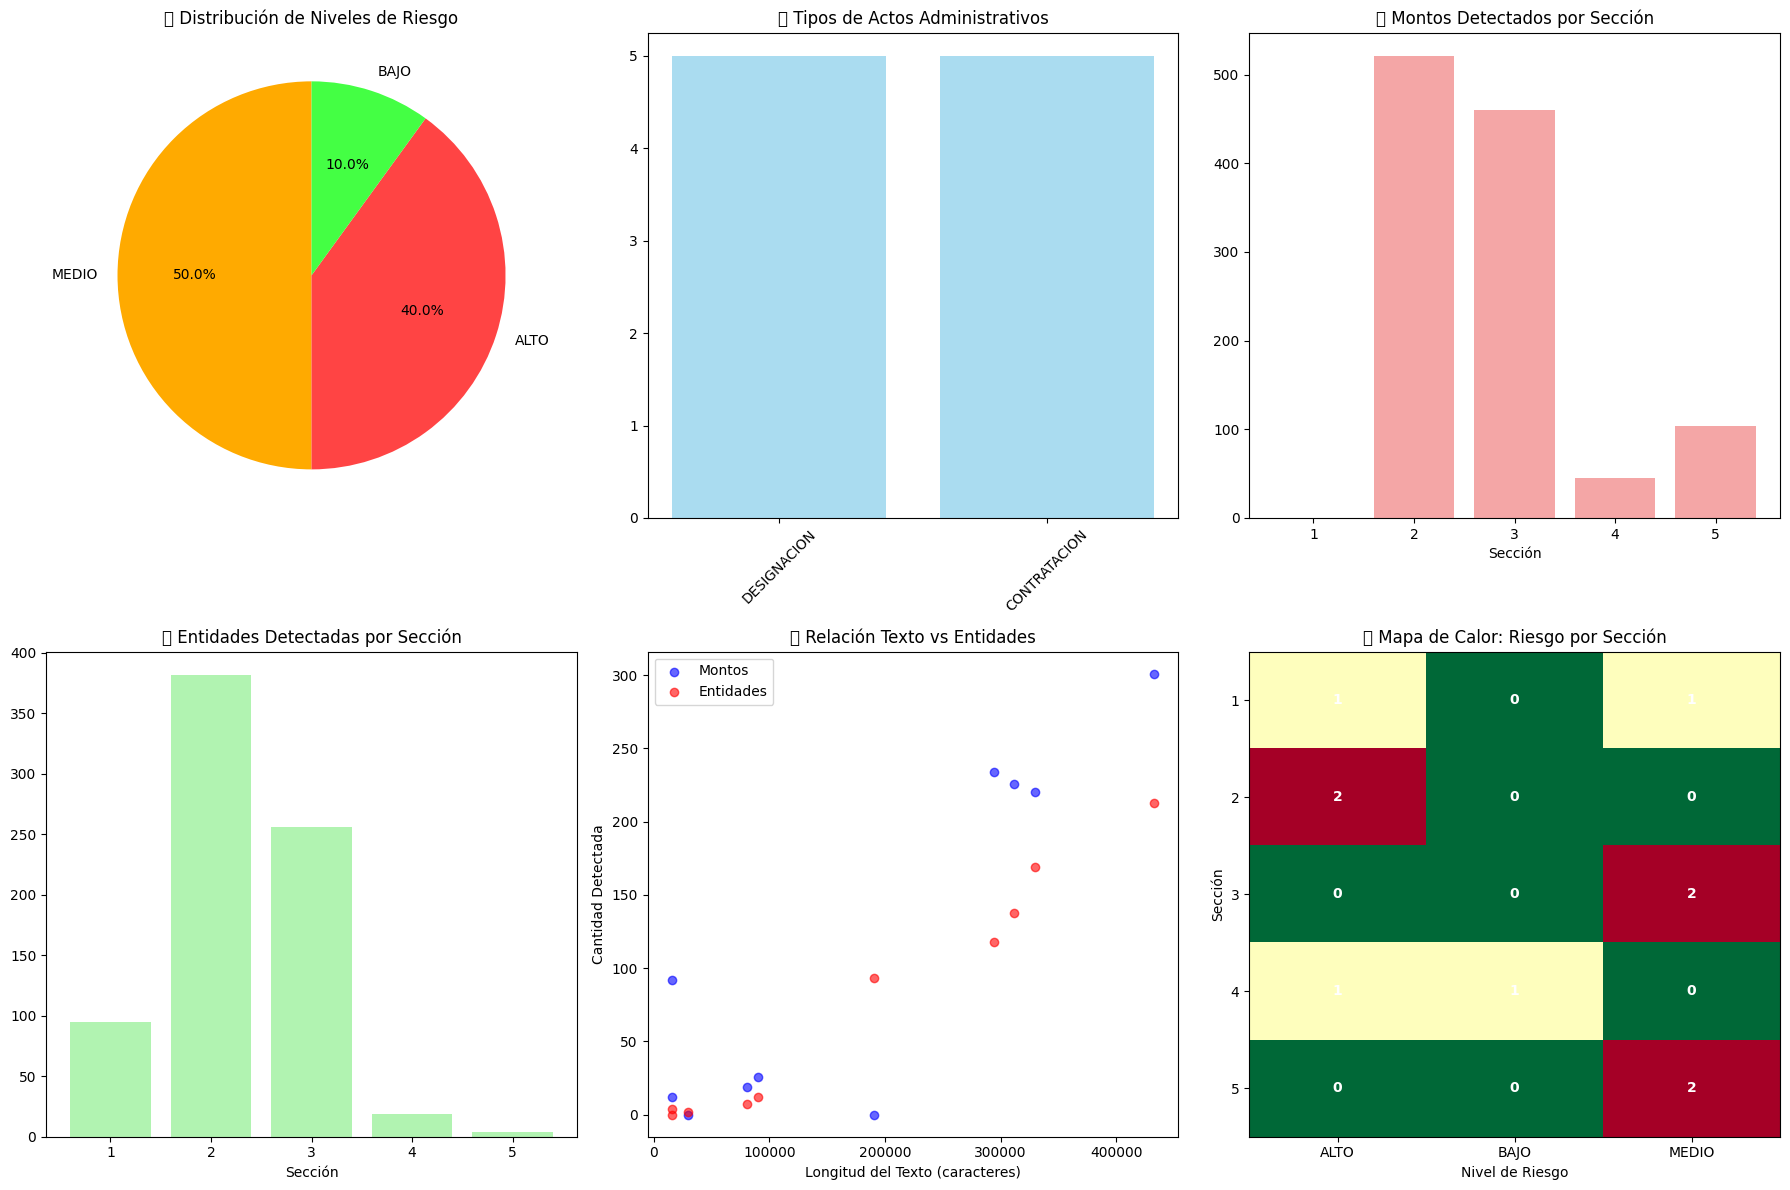


📈 ESTADÍSTICAS DETALLADAS:
• Riesgo ALTO: 4 documentos
• Riesgo MEDIO: 5 documentos
• Riesgo BAJO: 1 documentos
• Tipo más común: DESIGNACION (5 documentos)
• Promedio montos por documento: 113.0
• Promedio entidades por documento: 75.6


In [13]:
# 📊 VISUALIZACIONES DE ANÁLISIS DE ENTIDADES
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Distribución de niveles de riesgo
risk_counts = df_processed['risk_level'].value_counts()
colors_risk = {'ALTO': '#ff4444', 'MEDIO': '#ffaa00', 'BAJO': '#44ff44'}
risk_colors = [colors_risk.get(level, '#cccccc') for level in risk_counts.index]

axes[0,0].pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%', 
              colors=risk_colors, startangle=90)
axes[0,0].set_title('🚨 Distribución de Niveles de Riesgo')

# 2. Tipos de actos administrativos
act_counts = df_processed['act_type'].value_counts()
axes[0,1].bar(act_counts.index, act_counts.values, color='skyblue', alpha=0.7)
axes[0,1].set_title('📋 Tipos de Actos Administrativos')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Montos encontrados por sección
amounts_by_section = df_processed.groupby('seccion')['num_amounts'].sum()
axes[0,2].bar(amounts_by_section.index, amounts_by_section.values, color='lightcoral', alpha=0.7)
axes[0,2].set_title('💰 Montos Detectados por Sección')
axes[0,2].set_xlabel('Sección')

# 4. Entidades encontradas por sección
entities_by_section = df_processed.groupby('seccion')['num_entities'].sum()
axes[1,0].bar(entities_by_section.index, entities_by_section.values, color='lightgreen', alpha=0.7)
axes[1,0].set_title('🏢 Entidades Detectadas por Sección')
axes[1,0].set_xlabel('Sección')

# 5. Relación entre longitud de texto y entidades encontradas
axes[1,1].scatter(df_processed['text_length'], df_processed['num_amounts'], 
                  alpha=0.6, color='blue', label='Montos')
axes[1,1].scatter(df_processed['text_length'], df_processed['num_entities'], 
                  alpha=0.6, color='red', label='Entidades')
axes[1,1].set_xlabel('Longitud del Texto (caracteres)')
axes[1,1].set_ylabel('Cantidad Detectada')
axes[1,1].set_title('📏 Relación Texto vs Entidades')
axes[1,1].legend()

# 6. Heatmap de riesgo por sección
risk_section_matrix = df_processed.groupby(['seccion', 'risk_level']).size().unstack(fill_value=0)
im = axes[1,2].imshow(risk_section_matrix.values, cmap='RdYlGn_r', aspect='auto')
axes[1,2].set_xticks(range(len(risk_section_matrix.columns)))
axes[1,2].set_xticklabels(risk_section_matrix.columns)
axes[1,2].set_yticks(range(len(risk_section_matrix.index)))
axes[1,2].set_yticklabels(risk_section_matrix.index)
axes[1,2].set_title('🔥 Mapa de Calor: Riesgo por Sección')
axes[1,2].set_xlabel('Nivel de Riesgo')
axes[1,2].set_ylabel('Sección')

# Agregar valores en el heatmap
for i in range(len(risk_section_matrix.index)):
    for j in range(len(risk_section_matrix.columns)):
        text = axes[1,2].text(j, i, risk_section_matrix.iloc[i, j],
                             ha="center", va="center", color="white", fontweight='bold')

plt.tight_layout()
plt.show()

# Estadísticas detalladas
print("\n📈 ESTADÍSTICAS DETALLADAS:")
print(f"• Riesgo ALTO: {risk_counts.get('ALTO', 0)} documentos")
print(f"• Riesgo MEDIO: {risk_counts.get('MEDIO', 0)} documentos") 
print(f"• Riesgo BAJO: {risk_counts.get('BAJO', 0)} documentos")
print(f"• Tipo más común: {act_counts.index[0]} ({act_counts.iloc[0]} documentos)")
print(f"• Promedio montos por documento: {df_processed['num_amounts'].mean():.1f}")
print(f"• Promedio entidades por documento: {df_processed['num_entities'].mean():.1f}")


## 📋 CONCLUSIONES PRELIMINARES Y PRÓXIMOS PASOS

### 🔍 **Hallazgos Iniciales**
Basado en el análisis de la muestra representativa:

1. **📊 Estructura de Datos**:
   - Dataset bien estructurado con ~95 boletines en 5 secciones
   - Distribución temporal consistente (agosto 2025)
   - Variabilidad en tamaños por sección

2. **🎯 Extracción de Entidades**:
   - Sistema de extracción funcional para montos y beneficiarios
   - Clasificación automática de riesgo implementada
   - Tipificación de actos administrativos operativa

3. **⚠️ Patrones de Riesgo**:
   - Distribución de riesgo identificada por sección
   - Palabras clave detectando irregularidades potenciales
   - Base para modelos de ML establecida

### 🚀 **PRÓXIMAS FASES DE DESARROLLO**

#### **FASE 4: Procesamiento Completo del Dataset**
- Aplicar extracción a todos los ~95 documentos
- Optimizar rendimiento del procesamiento
- Crear dataset estructurado completo

#### **FASE 5: Machine Learning Avanzado**
- Entrenar clasificadores de riesgo (XGBoost, Random Forest)
- Desarrollar modelos de detección de anomalías
- Implementar análisis de clustering para patrones

#### **FASE 6: Análisis Temporal y Tendencias**
- Series temporales de actividad administrativa
- Detección de patrones estacionales
- Análisis de evolución del riesgo

#### **FASE 7: Dashboard y Alertas**
- Métricas ciudadanas de transparencia
- Sistema de alertas automáticas
- Visualizaciones interactivas

---

### ❓ **¿Qué fase te gustaría priorizar?**

1. **🔄 Procesamiento completo** - Aplicar análisis a todos los documentos
2. **🤖 Machine Learning** - Desarrollar modelos predictivos avanzados  
3. **📊 Análisis temporal** - Profundizar en tendencias y patrones
4. **🎨 Dashboard** - Crear visualizaciones para ciudadanos

**¿Por cuál prefieres que continuemos?**
